<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%207%20-%20Cutting%20Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descripción del problema

Entrada: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

Salida:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y los cortes necesarios para ello.

El problema de corte de varillas busca obtener determinada cantidad de cortes en una varilla, tienendo cada corte un precio, se busca cual es la cantidad de cortes que retornan la mayor cantidad de beneficio.

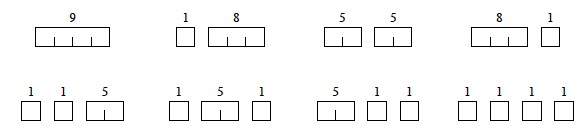

#2-Código

In [120]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

def RecursiveCut(A, index, N, recursiones, verbose = False):
  recursiones[0] += 1
  if verbose:
      print("Varilla de largo", N)
  if index == 0:
    if verbose:
      print("Valor:", N * A[0])
    return N * A[0]
  
  notCut = RecursiveCut(A,index - 1,N, recursiones, verbose)
  cut = -32767
  rod_length = index + 1;

  if rod_length <= N:
    
    cut = A[index]+ RecursiveCut(A,index,N - rod_length, recursiones, verbose);
    if verbose:
      print("Valor:", max(notCut, cut))

  return max(notCut, cut);

verbose = False
n = 5
array = cutrod_instance_generator(n)
recursiones = [0]
print("Precios:",array)
print("Maxima ganancia", RecursiveCut(array,len(array)-1,len(array),recursiones,verbose))
if verbose:
  print("Recursiones:", recursiones[0])

Precios: [10, 10, 16, 23, 30]
Maxima ganancia 50


In [108]:
def bottomUpCut(A, N, cont, verbose = False):
    r = [-1]*(N + 1)
    r[0] = 0

    s = [-1]*(N + 1)
 
    for i in range(1, N+1):
        q = -1
        for j in range(1, i + 1):
            cont[0] += 1
            temp = A[j] + r[i - j]
            if verbose:
              print("\nBarra de largo", i)
              print("Con cortes de largo:", j)
              print("Valor:",temp)
            if q < temp:
                q = temp
                s[i] = j
        r[i] = q
 
    return r, s

n = 5
p = cutrod_instance_generator(n+1)


cont = [0]
verbose = False
 
print("Precios:", p[1:])
r, s = bottomUpCut(p, n, cont, verbose)

print('\nMaxima ganancia:', r[n])
print('Cortes necesarios: ', end='')

while n > 0:
    print(s[n], end=' ')
    n -= s[n]

if verbose:
  print("\nSubProblemas resueltos:", cont[0])

Precios: [4, 5, 11, 14, 21]

Maxima ganancia: 21
Cortes necesarios: 5 

#2.1 Descripción del algoritmo

Solución recursiva:

Para solucionar este problema de manera recursiva se divide la varilla y se le aplica la misma función a cada división de la varilla, el valor máximo se actualizará con el mayor valor obtenido por cada recursión realizada a cada corte de varilla.

Solución bottomUp:

Para solucionar este problema de manera dinámica, se guarda en un arreglo extra el máximo valor que se optiene para cada subproblema, para esto se recorrerán todos los subproblemas posibles con un ciclo for con la $i$ desde $A[0]$ hasta $A[n]$ y luego en cada iteración $i$ se obtiene el valor de cada corte posible iterando con la variable $j$.

#2.2 - Ejecución paso a paso:

Haciendo uso de la opción verbose del algoritmo dinámico podemos observar la ejecución paso a paso del algoritmo, el siguiente ejemplo utiliza el arreglo $[10, 20, 30, 40, 41]$: 

Precios: [10, 20, 30, 40, 41]

Barra de largo 1
Con cortes de largo: 1
Valor: 10

Barra de largo 2
Con cortes de largo: 1
Valor: 20

Barra de largo 2
Con cortes de largo: 2
Valor: 20

Barra de largo 3
Con cortes de largo: 1
Valor: 30

Barra de largo 3
Con cortes de largo: 2
Valor: 30

Barra de largo 3
Con cortes de largo: 3
Valor: 30

Barra de largo 4
Con cortes de largo: 1
Valor: 40

Barra de largo 4
Con cortes de largo: 2
Valor: 40

Barra de largo 4
Con cortes de largo: 3
Valor: 40

Barra de largo 4
Con cortes de largo: 4
Valor: 40

Barra de largo 5
Con cortes de largo: 1
Valor: 50

Barra de largo 5
Con cortes de largo: 2
Valor: 50

Barra de largo 5
Con cortes de largo: 3
Valor: 50

Barra de largo 5
Con cortes de largo: 4
Valor: 50

Barra de largo 5
Con cortes de largo: 5
Valor: 41

Maxima ganancia: 50
Cortes necesarios: 1 1 1 1 1 
SubProblemas resueltos: 15


#3 - Tiempo de ejecución

Teniendo en cuenta que para encontrar el retorno máximo $r_n$ el algoritmo necesita solucionar cada problema por varilla de largo $k= 1...n$antes de solucionar el problema original. Y por cada sub-problema $k$ se debe de encontrar cada uno de los cortes de la varilla, siendo esto igual a $j = 1...k$ que sería el punto de corte. Esto significa que por cada problema $k$ se resuelven $j$ sub-problemos, lo que matematicamente se puede plantear como:

$T(n)=\sum\limits_{i=1}^{n+1}\sum\limits_{j=0}^{i}c$

$T(n)=c\sum\limits_{i=1}^{n+1}j$
$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

$T(n)=c*\frac{n(n+1)}{2}$

Considerando que el tiempo para resolver cada sub-problema es constante, ya que los valores que utiliza la función se obtienen a partir de 2 arreglos, por lo que el tiempo que posee esto es de $O(1)$.

Para construir la solución se debe de obtener los cortes para la varilla, estos se obtienen por medio del arreglo $D$ que posee tamaño $n$ y donde se guarda el índice ($j$)donde sea realizo el corte en cada varilla de largo$i$. El peor caso de esto es cuando todo esto da $n$ varilla de largo 1, por lo el tiempo de ejecución sería $O(n)$.

Con todo lo anterior podemos definir 3 funciones:
> $f(n)$ Que corresponde a la cantidad de sub-problemas
> $g(n)$ Es el tiempo que toma resolver cada sub-problema.
> $h(n)$ El tiempo en construir la solución.

Reemplazando se obtiene que:
$T(n) = O(n^2) + O(1) + O(n)$
$T(n) = O(n^2)$

Dado que el algoritmo se trata de uno de optimización el peor caso y el mejor son iguales, por lo que determina el tiempo de ejecución es tamaño del problema que recibe, por lo que se puede decir que la complejidad del algoritmo es $O(n^2)$.

#4 - Correctitud

El algoritmo recibe un arreglo $[a_1, a_2,..., a_n]$ de precios de venta, de donde retorna correctamente la ganancia máxima $r_n$.

##Prueba del Teorema.

Para comprobar el teorema utilizaremos inducción matemática con 2 casos.

###Caso base $(n=1)$
Para un varilla de largo 1, el algoritmo retorna inmediatamente el precio de la varilla ya que esta posee el tamaño minimo, por lo que no se puede dividir y solo posee un valor para $r_n$.

###Caso general $(n>1)$
Para una varilla de largo mayor a 1, se calcula la ganancia obtenida de $j$ ($1..n$), donde este es el tamaño de todos los posibles sub-problemas en los que se puede dividir el problema original. La función que obtiene el valor $r_n$ se puede describir de manera matemática como: 

$r_n = Precios_j + r_n-j$

> $Precios_j$ es el precio de una varilla de largo $j$, y $r_n-j$ es la ganancia máxima para una varilla de largo $n-j$.

Con esto sabemos que para cualquier varilla con largo $n-j$, ($j>=1$) su ganancia máxima se calculada correctamente.

Como se consideran todos los sub-problemas que pueden salir del problema original, sabemos que uno de estos será el valor que maximice la solucón buscada. El algoritmo retornará el $r_n$ máximo de todos los valores máximos de los sub-problemas.

Considerando todo lo anterior como correcto gracias al caso base y al general, podemos decir de que algoritmo es correcto.

#5 - Experimentos

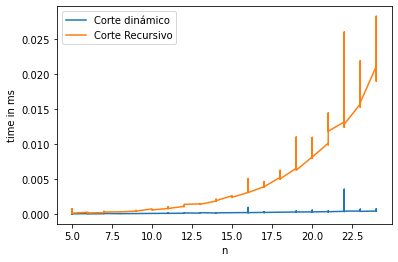

In [44]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,25):
  nums = []
  nums2 = []

  for i in range(0,n):
    cont = [0]
    a = cutrod_instance_generator(n)

    t = repeat(setup="from __main__ import bottomUpCut", stmt=f"bottomUpCut({a},{len(a)-1},{cont})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import RecursiveCut", stmt=f"RecursiveCut({a},{len(a)-1},{len(a)}, {cont})", repeat=1, number=10)

    x.append(n)
    y.append(t)

    x2.append(n)
    y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Corte dinámico", "Corte Recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Análisis de resultados**

En el gráfico se aprecia una gran diferencia en el tiempo de ejecución de ambos algoritmos, y siendo algo a apreciar es que, a pesar de que la implementación dinámica tiene complejidad O(n^2), es abismalmente más rápida que la implementación recursiva.

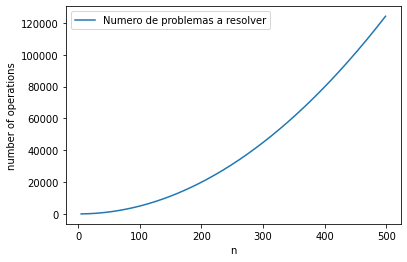

In [97]:
import matplotlib.pyplot as plt

x=[n for n in range(5,500)] 
y=[]; 

for n in range(5,500):
  cont = [0]
  a = cutrod_instance_generator(n)
  bottomUpCut(a, len(a)-1, cont)
  y.append(cont[0])

plt.plot(x,y)
plt.legend(["Numero de problemas a resolver"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Análisis de resultados**

El número de problemas aumenta de manera exponencial como se puede apreciar en el gráfico, esto coincide con la complejidad temporal $O(n^2)$ del algoritmo.